In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [20]:
df=pd.read_csv('D:\\Data_sets\\Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [21]:
df = df.iloc[:,3:]

In [22]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
X= df.iloc[:,:-1]

In [24]:
y=df.iloc[:,-1:]

In [25]:
geography = pd.get_dummies(X['Geography'], drop_first=True)

In [26]:
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [27]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [28]:
X= pd.concat([X,geography,gender], axis=1)

In [29]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [30]:
X.drop(['Geography','Gender'],axis=1, inplace=True)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [39]:
classifier = Sequential()

In [42]:
# Adding the input layer and the first hidden layer

# he_uniform and he_normal work weel with relu


classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [43]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5832 - accuracy: 0.7753 - val_loss: 0.5549 - val_accuracy: 0.7933
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5235 - accuracy: 0.7990 - val_loss: 0.5313 - val_accuracy: 0.7933
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5035 - accuracy: 0.7990 - val_loss: 0.5167 - val_accuracy: 0.7933
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4906 - accuracy: 0.7990 - val_loss: 0.5066 - val_accuracy: 0.7933
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4813 - accuracy: 0.7990 - val_loss: 0.4983 - val_accuracy: 0.7933
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4736 - accuracy: 0.7990 - val_loss: 0.4917 - val_accuracy: 0.7933
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4675 - accuracy: 0.7990 - val_loss: 0.4864 - val_accuracy: 0.7933

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4061 - accuracy: 0.8270 - val_loss: 0.4275 - val_accuracy: 0.8171
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4056 - accuracy: 0.8263 - val_loss: 0.4271 - val_accuracy: 0.8186
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4051 - accuracy: 0.8283 - val_loss: 0.4273 - val_accuracy: 0.8167
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4050 - accuracy: 0.8276 - val_loss: 0.4267 - val_accuracy: 0.8186
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4045 - accuracy: 0.8291 - val_loss: 0.4263 - val_accuracy: 0.8183
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4041 - accuracy: 0.8302 - val_loss: 0.4261 - val_accuracy: 0.8179
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8298 - val_loss: 0.4255 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


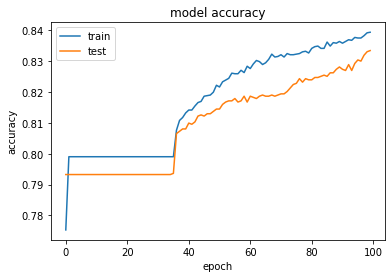

In [49]:
print(model_history.history.keys())


# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

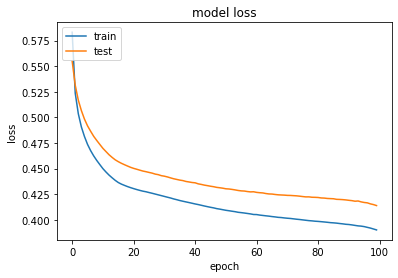

In [50]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [53]:
cm

array([[1544,   42],
       [ 279,  135]], dtype=int64)

In [54]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [55]:
score

0.8395

In [56]:
# u can also use droput to avoid overfitting